In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
mojo_2014=pd.read_csv("Box Office Mojo 2014.csv")
mojo_2015=pd.read_csv("Box Office Mojo 2015.csv")
mojo_2016=pd.read_csv("Box Office Mojo 2016.csv")
mojo_2017=pd.read_csv("Box Office Mojo 2017.csv")
mojo_2018=pd.read_csv("Box Office Mojo 2018.csv")

mojo_df=pd.concat([mojo_2014, mojo_2015, mojo_2016, mojo_2017, mojo_2018])
mojo_df=mojo_df.rename(columns={"Movie Title": "Title"})
mojo_df=mojo_df[["Title", "Total Gross", "Release Date", "Production Company", "Year"]]
mojo_df.head()

Title   Total Gross Release Date  \
0                Guardians of the Galaxy  $333,176,600        Aug 1   
1  The Hunger Games: Mockingjay - Part 1  $337,135,885       Nov 21   
2    Captain America: The Winter Soldier  $259,766,572        Apr 4   
3                         The Lego Movie  $257,760,692        Feb 7   
4        Transformers: Age of Extinction  $245,439,076       Jun 27   

                        Production Company  Year  
0  Walt Disney Studios Motion Pictures\n\n  2014  
1                            Lionsgate\n\n  2014  
2  Walt Disney Studios Motion Pictures\n\n  2014  
3                         Warner Bros.\n\n  2014  
4                   Paramount Pictures\n\n  2014

In [15]:
movie_collect=pd.read_csv("Movie Collection Data.csv")
movie_collect=movie_collect[["title", "genres", "budget", "revenue", "runtime"]]
movie_collect=movie_collect.rename(columns={"title": "Title", "genres": "Genre", "budget": "Budget", "revenue": "Revenue", "runtime": "Runtime"})

for i in range(len(movie_collect)):
    first_find = movie_collect["Genre"][i].find("'name':") + 9
    second_find = movie_collect["Genre"][i].find("}") - 1
    movie_collect["Genre"][i] = movie_collect["Genre"][i][first_find:second_find]
#movie_collect


movie_collect.head()

C:\Users\18312\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Title      Genre    Budget      Revenue  Runtime
0                    Toy Story  Animation  30000000  373554033.0     81.0
1                      Jumanji  Adventure  65000000  262797249.0    104.0
2             Grumpier Old Men    Romance         0          0.0    101.0
3            Waiting to Exhale     Comedy  16000000   81452156.0    127.0
4  Father of the Bride Part II     Comedy         0   76578911.0    106.0

In [19]:
merged_df=pd.merge(mojo_df, movie_collect, on="Title", how= "left")
merged_df=merged_df.dropna()
merged_df=merged_df.loc[merged_df["Budget"] != "0"]
merged_df=merged_df.set_index("Title")


merged_df["Total Gross"]=merged_df["Total Gross"].str.replace("$", "")
merged_df["Total Gross"]=merged_df["Total Gross"].str.replace(",", "")
merged_df

Total Gross Release Date  \
Title                                                            
Guardians of the Galaxy                 333176600        Aug 1   
The Hunger Games: Mockingjay - Part 1   337135885       Nov 21   
Captain America: The Winter Soldier     259766572        Apr 4   
The Lego Movie                          257760692        Feb 7   
Transformers: Age of Extinction         245439076       Jun 27   
...                                           ...          ...   
Intersection                                 5116       Jun 15   
The Peacemaker                               4400        Feb 9   
The Family                                   3696        Aug 3   
Hot to Trot                                  3133       Aug 24   
Forever                                     31502       Sep 12   

                                                            Production Company  \
Title                                                                            
Guardians of the Galaxy                Walt Disney Studios Motion Pictures\n\n   
The Hunger Games: Mockingjay - Part 1                            Lionsgate\n\n   
Captain America: The Winter Soldier    Walt Disney Studios Motion Pictures\n\n   
The Lego Movie                                                Warner Bros.\n\n   
Transformers: Age of Extinction                         Paramount Pictures\n\n   
...                                                                        ...   
Intersection                                              Indican Pictures\n\n   
The Peacemaker                                                               -   
The Family                                                   Film Movement\n\n   
Hot to Trot                                                      First Run\n\n   
Forever                                                       Icarus Films\n\n   

                                       Year            Genre     Budget  \
Title                                                                     
Guardians of the Galaxy                2014           Action  170000000   
The Hunger Games: Mockingjay - Part 1  2014  Science Fiction  125000000   
Captain America: The Winter Soldier    2014           Action  170000000   
The Lego Movie                         2014        Adventure   60000000   
Transformers: Age of Extinction        2014  Science Fiction  210000000   
...                                     ...              ...        ...   
Intersection                           2018            Drama   45000000   
The Peacemaker                         2018           Action   50000000   
The Family                             2018            Crime   30000000   
Hot to Trot                            2018           Comedy    9000000   
Forever                                2018      Documentary        130   

                                            Revenue  Runtime  
Title                                                         
Guardians of the Galaxy                7.733286e+08    121.0  
The Hunger Games: Mockingjay - Part 1  7.521002e+08    123.0  
Captain America: The Winter Soldier    7.147666e+08    136.0  
The Lego Movie                         4.691607e+08    100.0  
Transformers: Age of Extinction        1.091405e+09    165.0  
...                                             ...      ...  
Intersection                           2.135589e+07     98.0  
The Peacemaker                         0.000000e+00    124.0  
The Family                             3.689422e+07    111.0  
Hot to Trot                            6.436211e+06     88.0  
Forever                                0.000000e+00     97.0  

[1133 rows x 8 columns]

In [17]:
opening_data= pd.read_csv("Box Office Mojo Opening Data.csv")
opening_data=opening_data[["Movie Title", "Opening Amount", "Release Date", "Production Company"]]
#opening_data=opening_data.set_index("Production Company")

opening_data["Opening Amount"]=opening_data["Opening Amount"].str.replace("$", "")
opening_data["Opening Amount"]=opening_data["Opening Amount"].str.replace(",", "")
opening_data["Production Company"]=opening_data["Production Company"].str.replace("\n\n", "")
opening_data.head()


Movie Title Opening Amount  Release Date  \
0                           Avengers: Endgame      357115007  Apr 26, 2019   
1                      Avengers: Infinity War      257698183  Apr 27, 2018   
2  Star Wars: Episode VII - The Force Awakens      247966675  Dec 18, 2015   
3     Star Wars: Episode VIII - The Last Jedi      220009584  Dec 15, 2017   
4                              Jurassic World      208806270  Jun 12, 2015   

                    Production Company  
0  Walt Disney Studios Motion Pictures  
1  Walt Disney Studios Motion Pictures  
2  Walt Disney Studios Motion Pictures  
3  Walt Disney Studios Motion Pictures  
4                   Universal Pictures

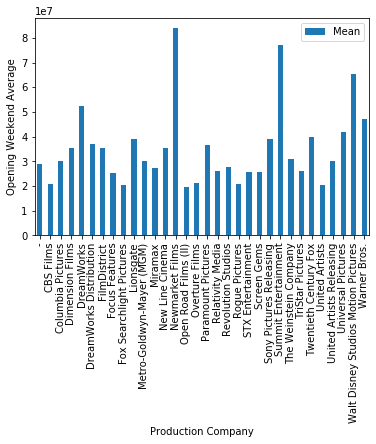

In [18]:
opening_data["Opening Amount"]=opening_data["Opening Amount"].astype(int)

avg_opening=opening_data.groupby("Production Company")["Opening Amount"]
avg_opening_mean= avg_opening.mean()
#avg_opening=avg_opening.set_index("Production Company")
company_avg= pd.DataFrame({"Mean": avg_opening_mean})

bar=company_avg.plot(kind="bar")
bar.set_ylabel("Opening Weekend Average")
#plt.ylabel("Opening Weekend Average")
plt.show()
#avg_opening